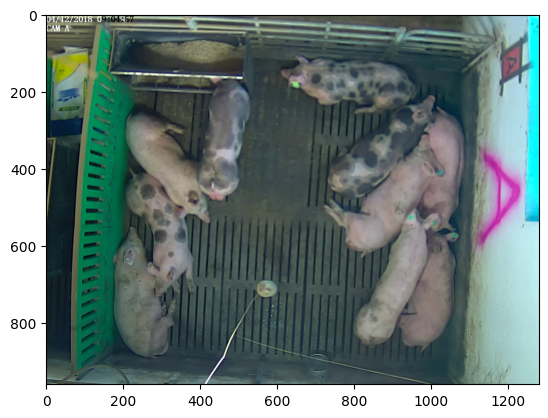

In [43]:
import imageio.v3 as iio
import skimage
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import scipy

path = "/data/bioeng/pigs/videosPenA_2018_12_04_9h04_12h14/1_Manual Record_2018-12-04 09-04-54_2018-12-04 09-17-31.mp4"

frame = iio.imread(path, index=100)

plt.imshow(frame)
plt.show()

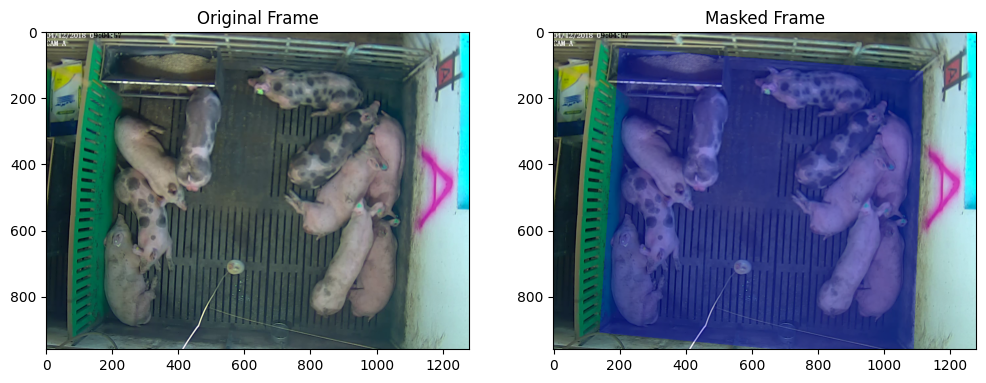

In [44]:
# Define the four vertices of the mask (row, col)
vertices = np.array([[910, 140], [50, 200], [120, 1120], [1000, 1090]])  # Adjust as needed

# Create a mask
mask = np.zeros(frame.shape[:2], dtype=bool)  # Only take height and width
rr, cc = skimage.draw.polygon(vertices[:, 0], vertices[:, 1], mask.shape)
mask[rr, cc] = True

# Apply the mask (Example: Set masked region to black)
masked_frame = frame.copy()
alpha = 0.3  # Adjust opacity (0 = fully transparent, 1 = fully opaque)
masked_frame[mask] = (masked_frame[mask] * (1 - alpha) + np.array([0, 0, 255]) * alpha).astype(np.uint8)

# Display original and masked images
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(frame)
ax[0].set_title("Original Frame")

ax[1].imshow(masked_frame)
ax[1].set_title("Masked Frame")

plt.show()

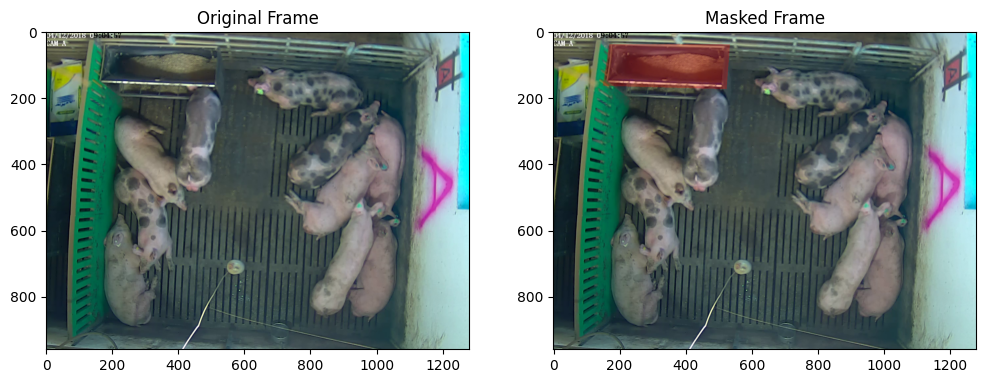

In [45]:
# Define the four vertices of the mask (row, col)
vertices = np.array([[165, 150], [40, 170], [40, 535], [175, 525]])  # Adjust as needed

# Create a mask
mask = np.zeros(frame.shape[:2], dtype=bool)  # Only take height and width
rr, cc = skimage.draw.polygon(vertices[:, 0], vertices[:, 1], mask.shape)
mask[rr, cc] = True

# Apply the mask (Example: Set masked region to black)
masked_frame = frame.copy()
alpha = 0.3  # Adjust opacity (0 = fully transparent, 1 = fully opaque)
masked_frame[mask] = (masked_frame[mask] * (1 - alpha) + np.array([255, 0, 0]) * alpha).astype(np.uint8)

# Display original and masked images
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(frame)
ax[0].set_title("Original Frame")

ax[1].imshow(masked_frame)
ax[1].set_title("Masked Frame")

plt.show()

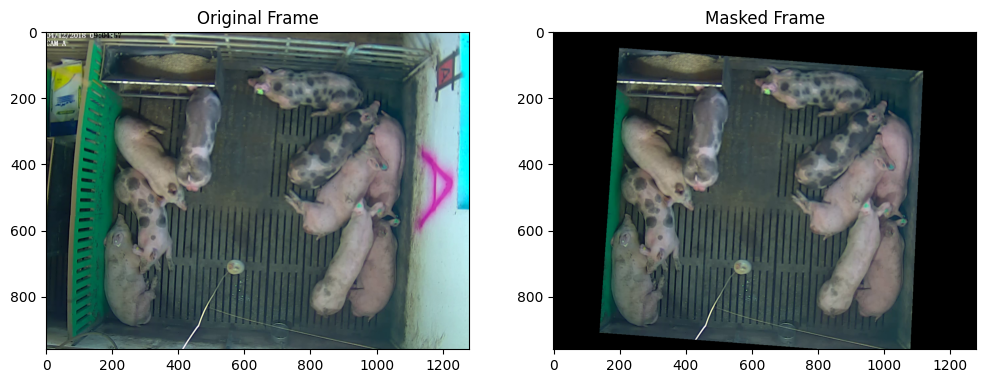

In [46]:
# Define the four vertices of the mask (row, col)
vertices = np.array([[910, 140], [50, 200], [120, 1120], [980, 1080]])  # Adjust as needed

# Create a mask
mask = np.zeros(frame.shape[:2], dtype=bool)  # Only take height and width
rr, cc = skimage.draw.polygon(vertices[:, 0], vertices[:, 1], mask.shape)
mask[rr, cc] = True

# Apply the mask (Example: Set masked region to black)
masked_frame = np.zeros_like(frame)
masked_frame[mask] = frame[mask]

# Display original and masked images
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(frame)
ax[0].set_title("Original Frame")

ax[1].imshow(masked_frame)
ax[1].set_title("Masked Frame")

plt.show()

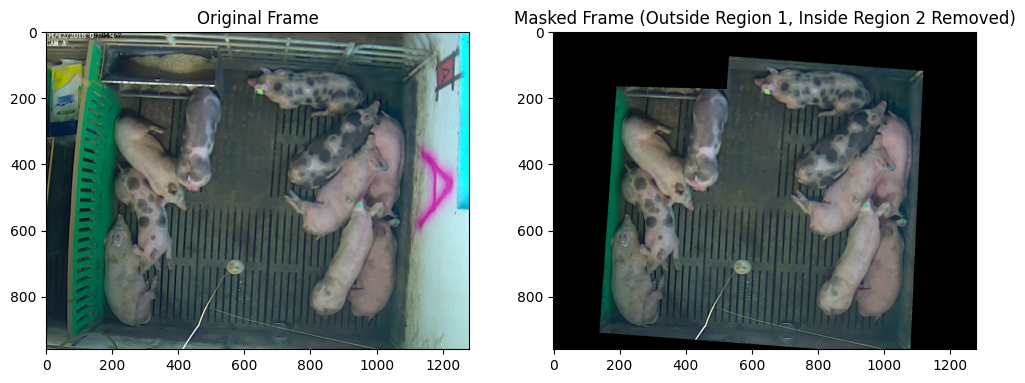

In [47]:
# Define the two regions (vertices)
vertices1 = np.array([[910, 140], [50, 200], [120, 1120], [980, 1080]])  # First region to keep
vertices2 = np.array([[165, 150], [40, 170], [40, 535], [175, 525]])      # Second region to remove

# Create a mask for the region to keep (inside vertices1)
mask1 = np.zeros(frame.shape[:2], dtype=bool)
rr1, cc1 = skimage.draw.polygon(vertices1[:, 0], vertices1[:, 1], mask1.shape)
mask1[rr1, cc1] = True

# Create a mask for the region to remove (inside vertices2)
mask2 = np.zeros(frame.shape[:2], dtype=bool)
rr2, cc2 = skimage.draw.polygon(vertices2[:, 0], vertices2[:, 1], mask2.shape)
mask2[rr2, cc2] = True

# Create the final mask
# Final mask keeps region inside vertices1 (mask1), and removes region inside vertices2 (mask2)
final_mask = mask1 & ~mask2  # Inside vertices1 and outside vertices2

# Apply the final mask:
masked_frame = np.zeros_like(frame)  # Start with a black frame
masked_frame[final_mask] = frame[final_mask]  # Keep pixels inside the final mask

# Display original and masked images
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(frame)
ax[0].set_title("Original Frame")

ax[1].imshow(masked_frame)
ax[1].set_title("Masked Frame (Outside Region 1, Inside Region 2 Removed)")

frame = masked_frame

plt.show()

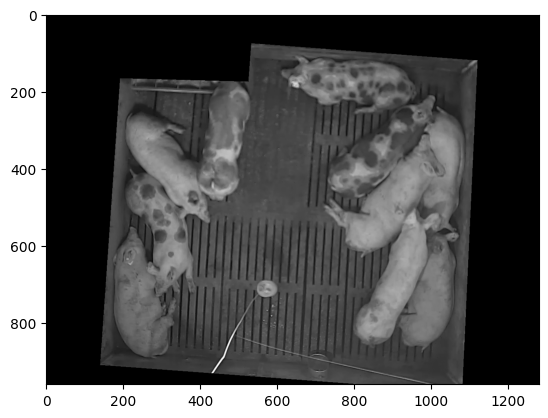

In [48]:
frame_gray = skimage.color.rgb2gray(frame)
plt.imshow(frame_gray, cmap="gray")
plt.show()

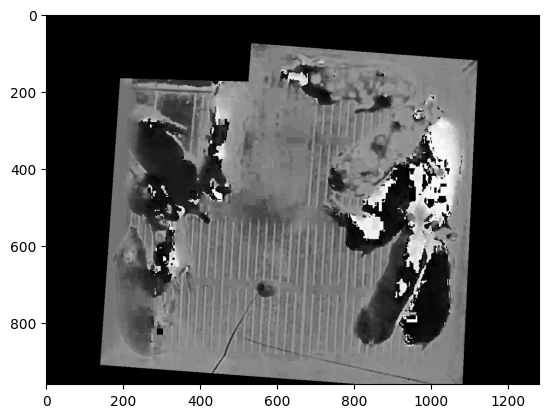

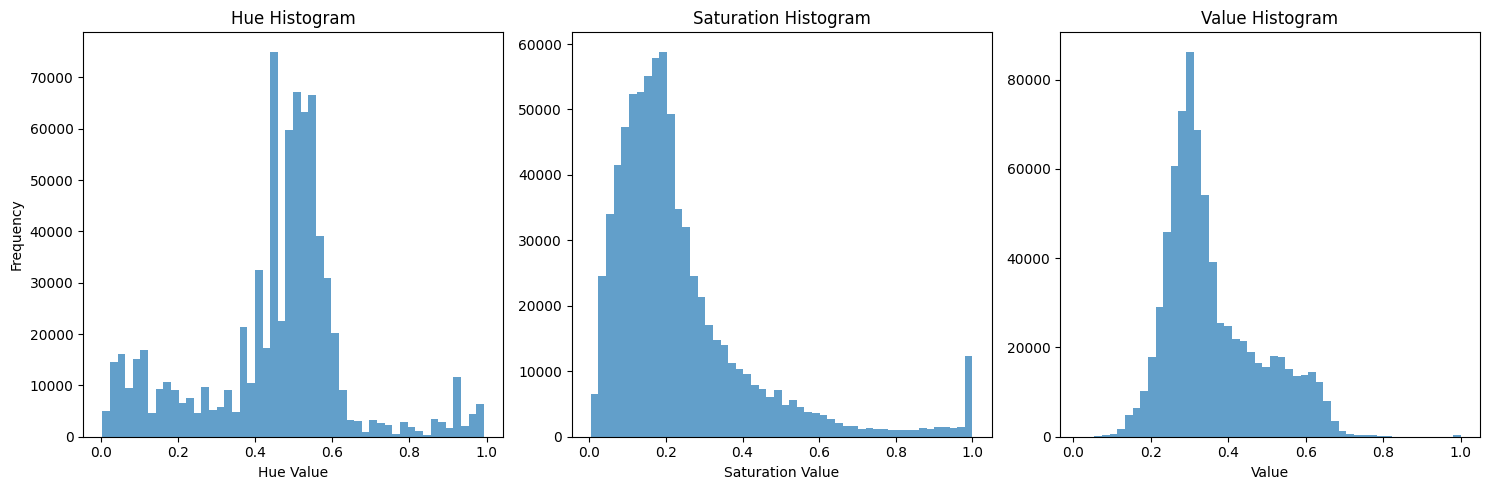

In [24]:
frame_hsv = skimage.color.rgb2hsv(frame)
plt.imshow(frame_hsv[:,:,0], cmap="gray")
plt.show()

# Extract H, S, and V channels
hue = frame_hsv[:, :, 0].flatten()
saturation = frame_hsv[:, :, 1].flatten()
value = frame_hsv[:, :, 2].flatten()

hue = hue[hue > 0]
saturation = saturation[saturation > 0]
value = value[value > 0]

# Create histograms for H, S, and V
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].hist(hue, bins=50, alpha=0.7)
axes[0].set_title("Hue Histogram")
axes[0].set_xlabel("Hue Value")
axes[0].set_ylabel("Frequency")

axes[1].hist(saturation, bins=50, alpha=0.7)
axes[1].set_title("Saturation Histogram")
axes[1].set_xlabel("Saturation Value")

axes[2].hist(value, bins=50, alpha=0.7)
axes[2].set_title("Value Histogram")
axes[2].set_xlabel("Value")

plt.tight_layout()
plt.show()

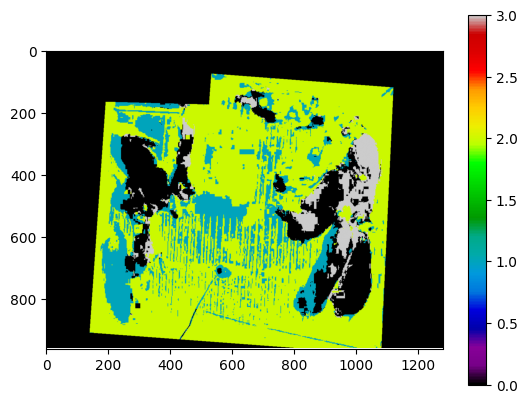

In [30]:
frame_hsv = skimage.color.rgb2hsv(frame)

hue_channel = frame_hsv[:,:,0]

thresholds = skimage.filters.threshold_multiotsu(hue_channel, classes=4)

segmented_image = np.digitize(hue_channel, bins=thresholds)

plt.imshow(segmented_image, cmap="nipy_spectral")
plt.colorbar()
plt.show()

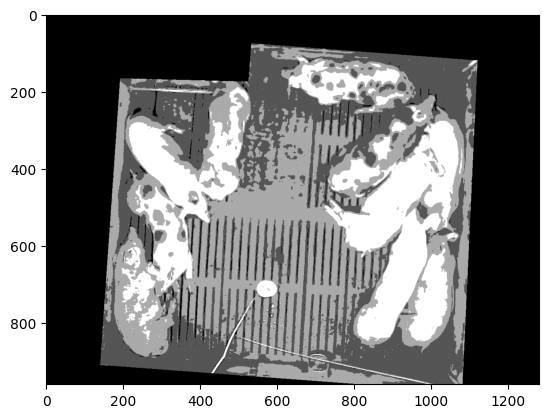

In [50]:
thresholds = skimage.filters.threshold_multiotsu(frame_gray, classes=4)
segmented = np.digitize(frame_gray, bins=thresholds)
plt.imshow(segmented, cmap="gray")
plt.show()

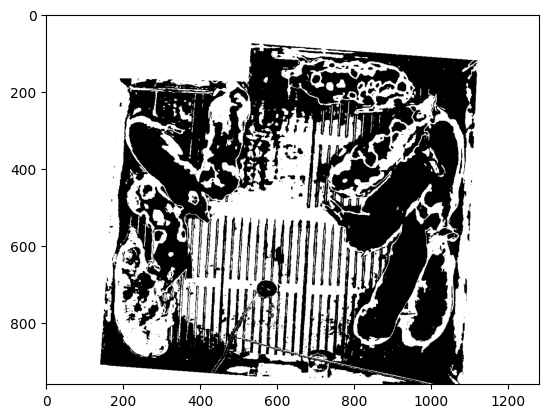

In [ ]:
segmented_2 = (segmented == 0) | (segmented == 2)
plt.imshow(segmented_2, cmap="gray")
plt.show()

## Try 2

(np.float64(-0.5), np.float64(1279.5), np.float64(959.5), np.float64(-0.5))

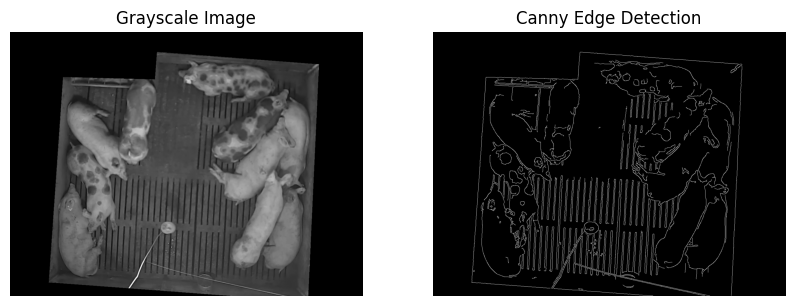

In [7]:
frame_gray = skimage.color.rgb2gray(frame)

edges = skimage.feature.canny(frame_gray, low_threshold=0.1, high_threshold=0.3)

# Display results
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(frame_gray, cmap="gray")
ax[0].set_title("Grayscale Image")
ax[0].axis("off")

ax[1].imshow(edges, cmap="gray")
ax[1].set_title("Canny Edge Detection")
ax[1].axis("off")

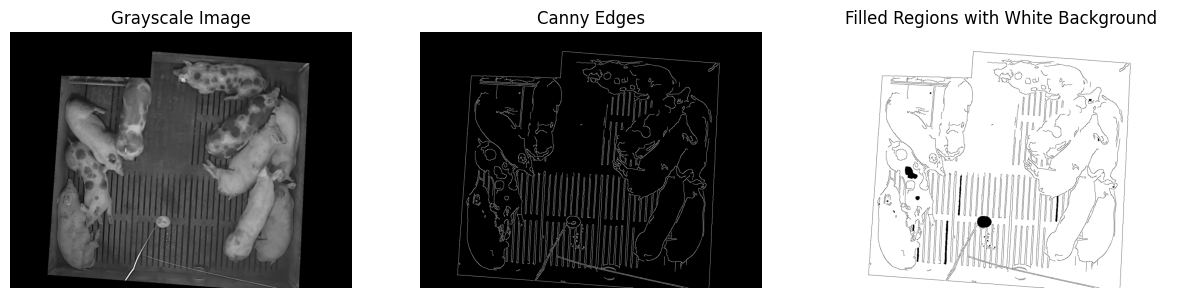

In [8]:
frame_gray = skimage.color.rgb2gray(frame)

edges = skimage.feature.canny(frame_gray, low_threshold=0.1, high_threshold=0.3)

# Fill enclosed regions using morphological operations
filled_regions = scipy.ndimage.binary_fill_holes(edges)

# Create a colored output: White background, Black foreground (or any color)
output_image = np.ones_like(frame_gray) * 255  # White background
output_image[filled_regions] = 0  # Black filled regions

# Display results
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(frame_gray, cmap="gray")
ax[0].set_title("Grayscale Image")
ax[0].axis("off")

ax[1].imshow(edges, cmap="gray")
ax[1].set_title("Canny Edges")
ax[1].axis("off")

ax[2].imshow(output_image, cmap="gray")
ax[2].set_title("Filled Regions with White Background")
ax[2].axis("off")

plt.show()


/tmp/ipykernel_773989/3768257718.py:6: FutureWarning: `square` is deprecated since version 0.25 and will be removed in version 0.27. Use `skimage.morphology.footprint_rectangle` instead.
  edges_dilated = skimage.morphology.dilation(edges, skimage.morphology.square(3))  # Increases thickness
/tmp/ipykernel_773989/3768257718.py:7: FutureWarning: `square` is deprecated since version 0.25 and will be removed in version 0.27. Use `skimage.morphology.footprint_rectangle` instead.
  edges_closed = skimage.morphology.closing(edges, skimage.morphology.square(3)) # Closes small gaps


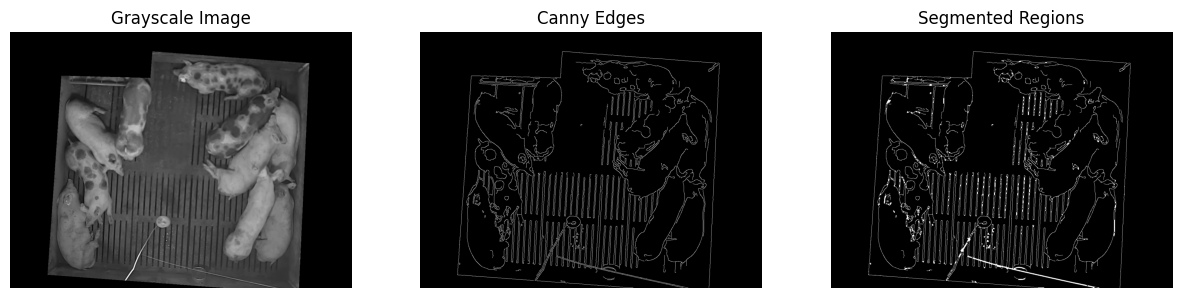

In [9]:
frame_gray = skimage.color.rgb2gray(frame)

edges = skimage.feature.canny(frame_gray, low_threshold=0.08, high_threshold=0.3)


edges_dilated = skimage.morphology.dilation(edges, skimage.morphology.square(3))  # Increases thickness
edges_closed = skimage.morphology.closing(edges, skimage.morphology.square(3)) # Closes small gaps

# Display results
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(frame_gray, cmap="gray")
ax[0].set_title("Grayscale Image")
ax[0].axis("off")

ax[1].imshow(edges, cmap="gray")
ax[1].set_title("Canny Edges")
ax[1].axis("off")

ax[2].imshow(edges_closed, cmap="gray")
ax[2].set_title("Segmented Regions")
ax[2].axis("off")

plt.show()

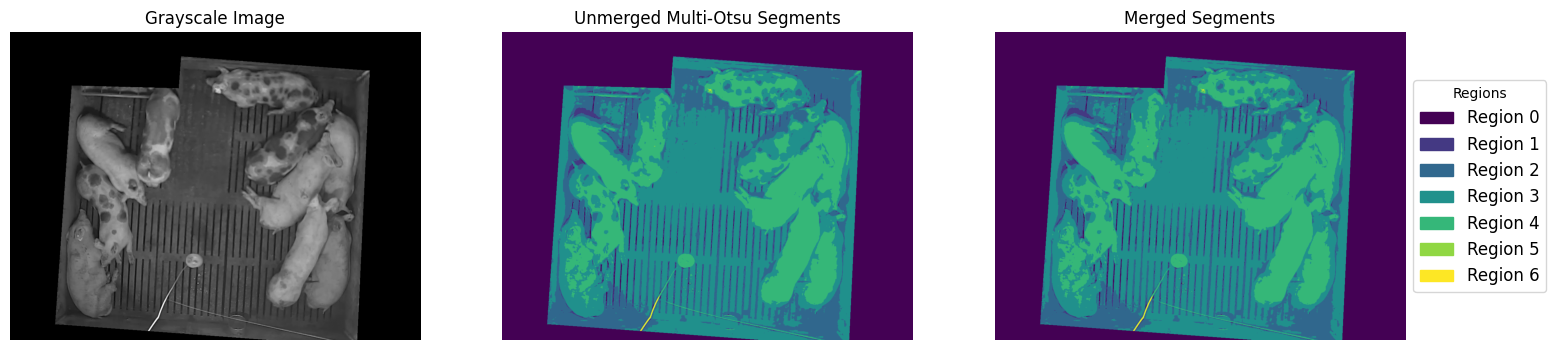

In [10]:
# Convert image to grayscale
frame_gray = skimage.color.rgb2gray(frame)

# Apply Multi-Otsu Thresholding with custom thresholds
# thresholds = [0.08, 0.13, 0.2, 0.41992188, 0.760, 0.84]
thresholds = [0.08, 0.13, 0.25, 0.41992188, 0.760, 0.84]
segmented = np.digitize(frame_gray, bins=thresholds)

# ---- Merge Certain Regions ----
segmented_merged = segmented.copy()
segmented_merged[(segmented == 0)] = 0
segmented_merged[(segmented == 1)] = 1
segmented_merged[(segmented == 2)] = 2
segmented_merged[(segmented == 3)] = 3
segmented_merged[(segmented == 4)] = 4
segmented_merged[(segmented == 5)] = 5
segmented_merged[(segmented == 6)] = 6

colormap = plt.cm.viridis
unique_values = np.unique(segmented_merged)  # Get unique region values
colors = [colormap(i / max(unique_values)) for i in unique_values]  # Assign colors

# Create figure
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

# Grayscale image
ax[0].imshow(frame_gray, cmap="gray")
ax[0].set_title("Grayscale Image")
ax[0].axis("off")

# Unmerged segmented image
ax[1].imshow(segmented, cmap="viridis")
ax[1].set_title("Unmerged Multi-Otsu Segments")
ax[1].axis("off")

# Merged segmented image
img = ax[2].imshow(segmented_merged, cmap="viridis")
ax[2].set_title("Merged Segments")
ax[2].axis("off")

# ---- Add Custom Legend ----
patches = [mpatches.Patch(color=colors[i], label=f"Region {val}") for i, val in enumerate(unique_values)]
legend = ax[2].legend(
    handles=patches, 
    loc="center left", 
    bbox_to_anchor=(1, 0.5),  # Places legend **outside** to the right
    fontsize=12, 
    title="Regions"
)


plt.show()


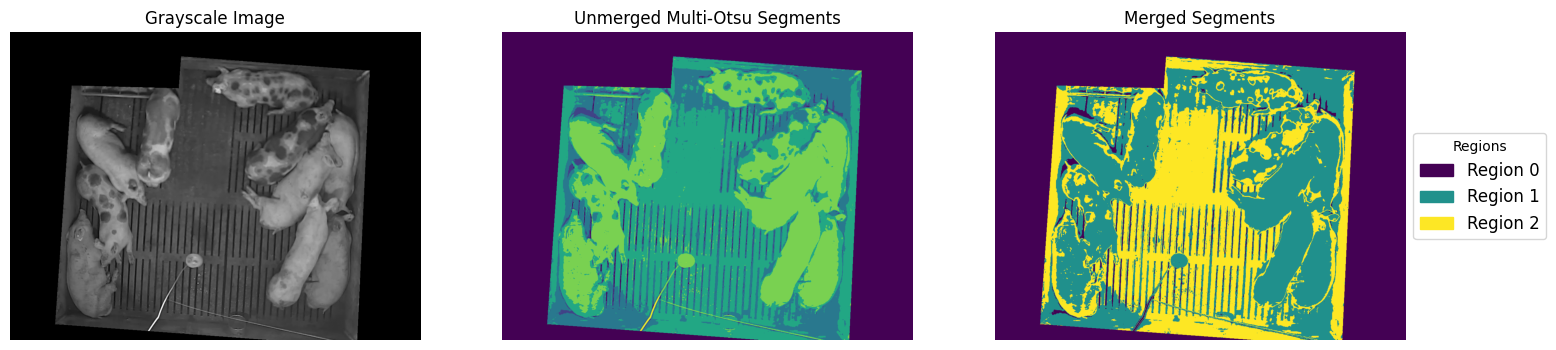

In [22]:
# Convert image to grayscale
frame_gray = skimage.color.rgb2gray(frame)

# Apply Multi-Otsu Thresholding with custom thresholds
thresholds = [0.08, 0.138, 0.248, 0.37, 0.760]
segmented = np.digitize(frame_gray, bins=thresholds)

# ---- Merge Certain Regions ----
segmented_merged = segmented.copy()
segmented_merged[(segmented == 0) | (segmented == 1) | (segmented == 5)] = 0
segmented_merged[(segmented == 2) | (segmented == 4)] = 1
segmented_merged[(segmented == 3)] = 2

colormap = plt.cm.viridis
unique_values = np.unique(segmented_merged)  # Get unique region values
colors = [colormap(i / max(unique_values)) for i in unique_values]  # Assign colors

# Create figure
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

# Grayscale image
ax[0].imshow(frame_gray, cmap="gray")
ax[0].set_title("Grayscale Image")
ax[0].axis("off")

# Unmerged segmented image
ax[1].imshow(segmented, cmap="viridis")
ax[1].set_title("Unmerged Multi-Otsu Segments")
ax[1].axis("off")

# Merged segmented image
img = ax[2].imshow(segmented_merged, cmap="viridis")
ax[2].set_title("Merged Segments")
ax[2].axis("off")

# ---- Add Custom Legend ----
patches = [mpatches.Patch(color=colors[i], label=f"Region {val}") for i, val in enumerate(unique_values)]
legend = ax[2].legend(
    handles=patches, 
    loc="center left", 
    bbox_to_anchor=(1, 0.5),  # Places legend **outside** to the right
    fontsize=12, 
    title="Regions"
)


plt.show()


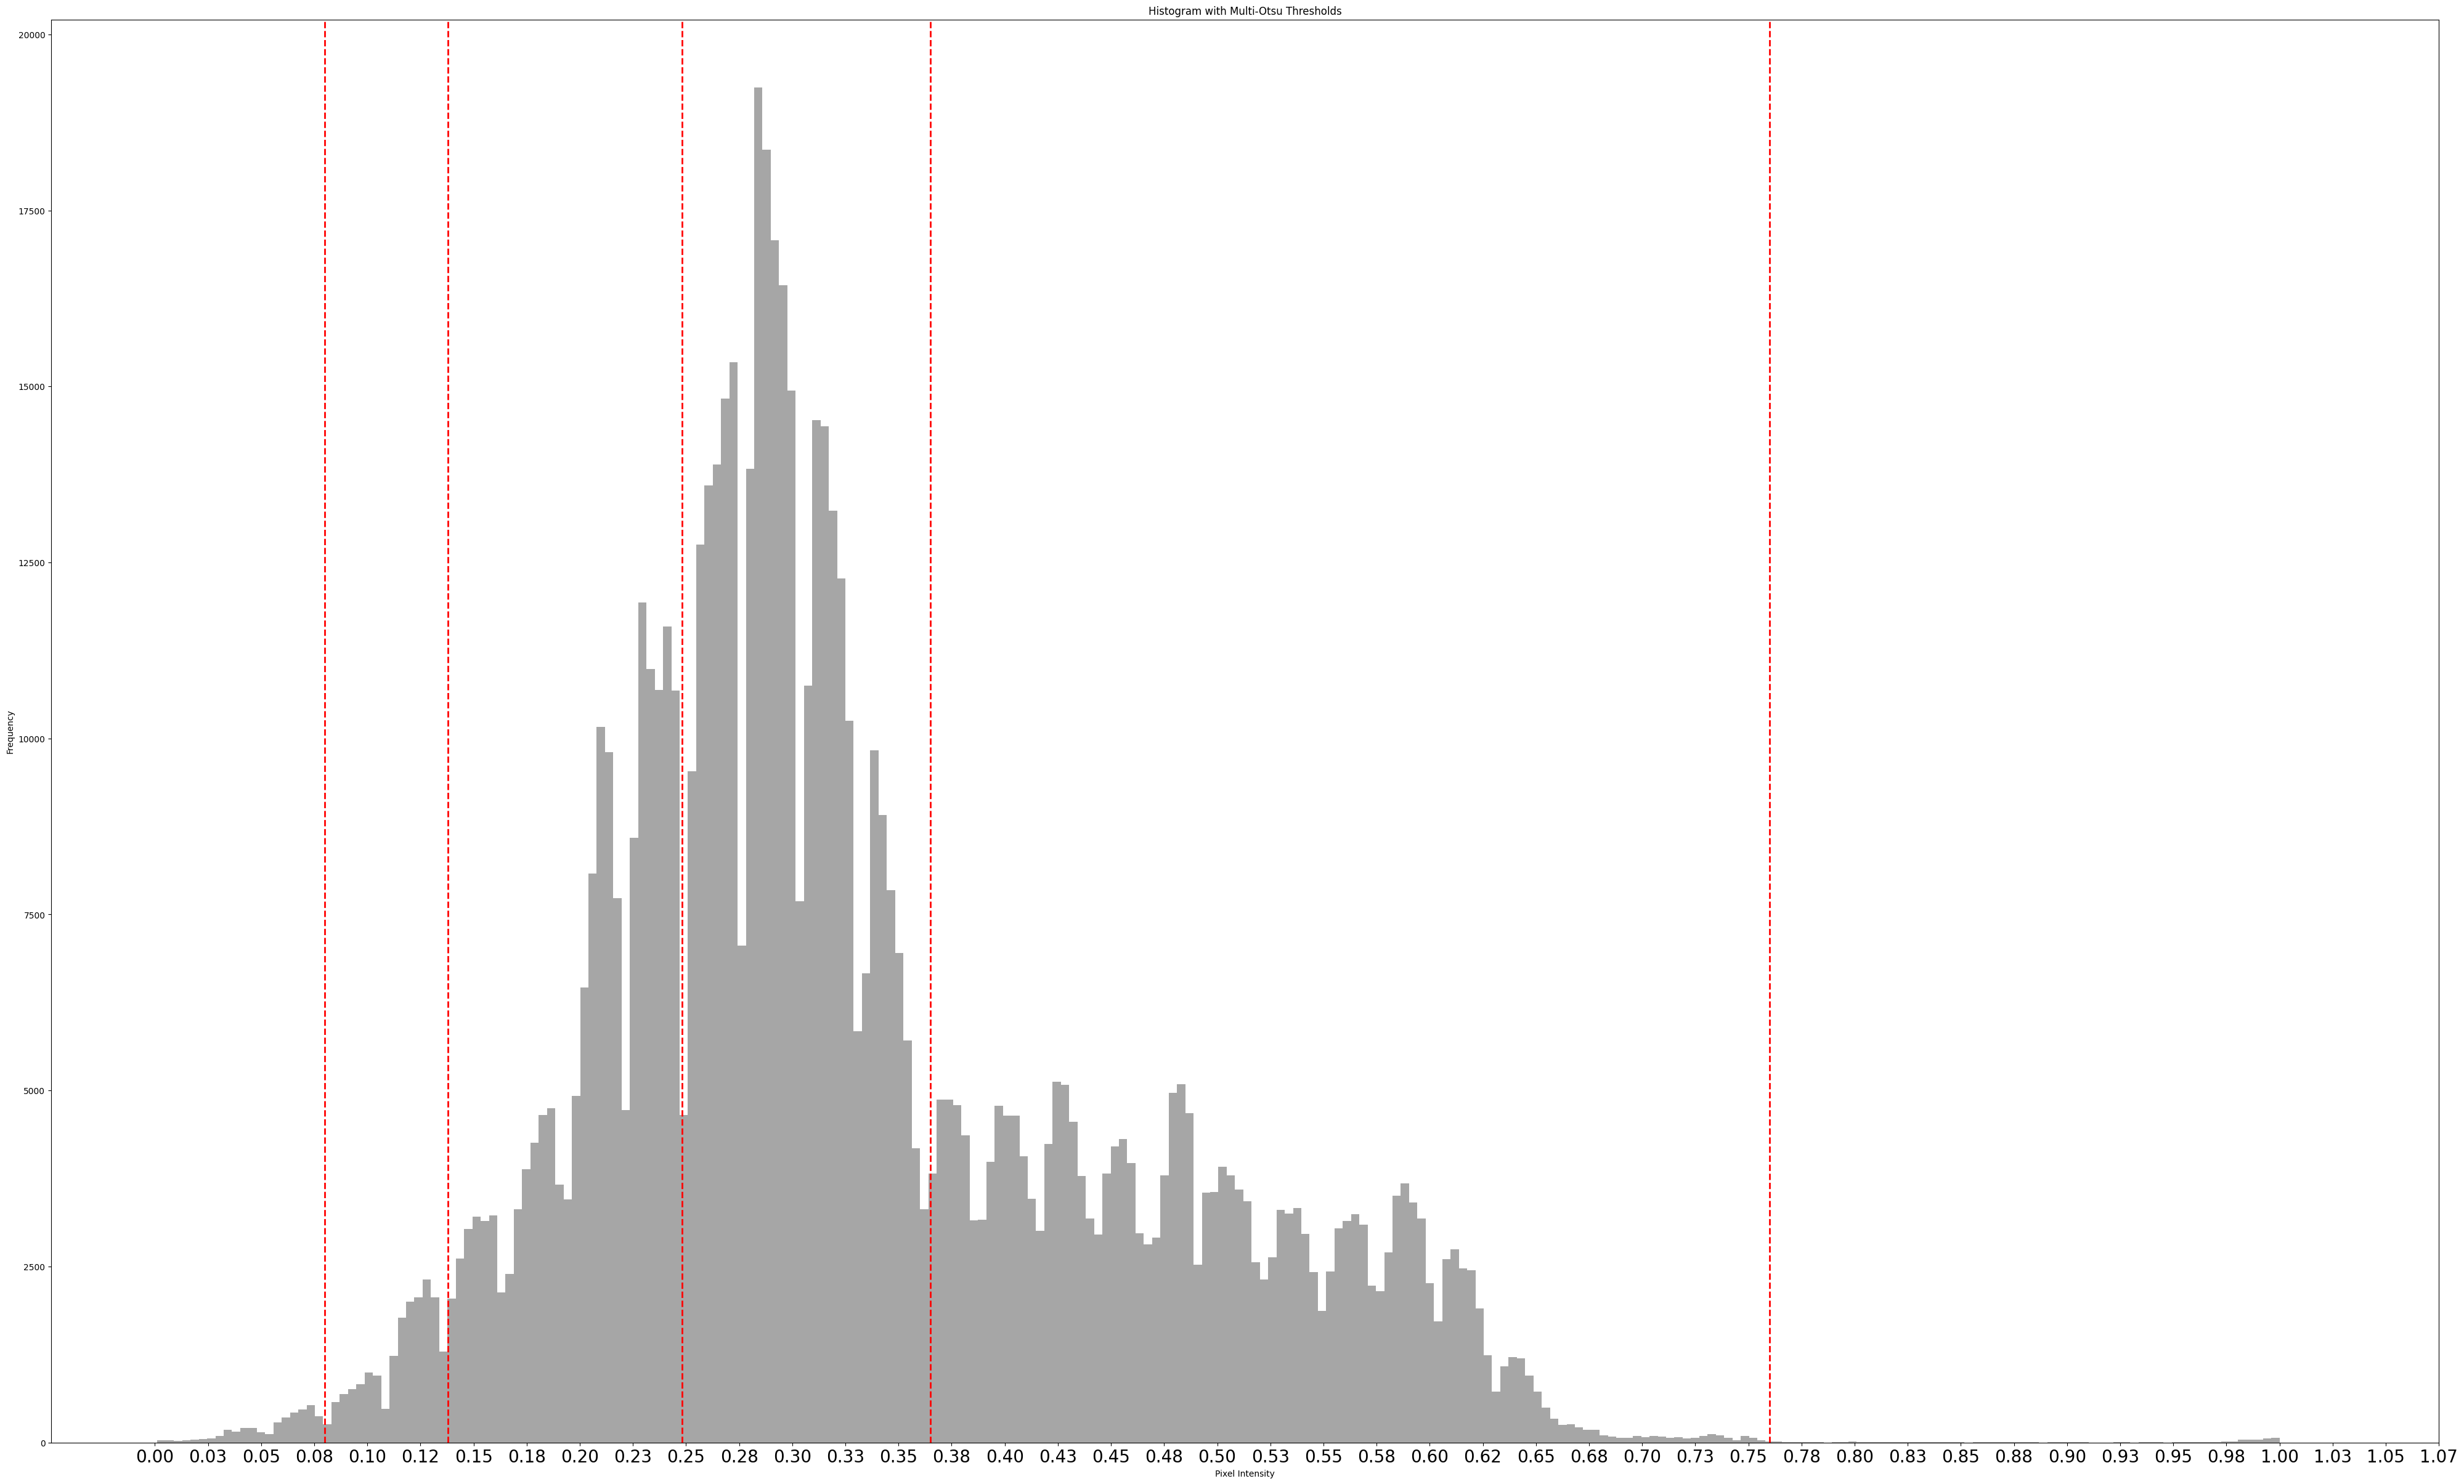

In [54]:
thresholds = [0.08, 0.138, 0.248, 0.365, 0.760]

fig, ax = plt.subplots(1, 1, figsize=(50, 30))

filtered_data = frame_gray.ravel()
filtered_data = filtered_data[filtered_data > 0]

# Histogram with thresholds
ax.hist(filtered_data, bins=256, color='gray', alpha=0.7)
for thresh in thresholds:
    ax.axvline(thresh, color='r', linestyle='dashed', linewidth=2)  # Mark thresholds
ax.set_title("Histogram with Multi-Otsu Thresholds")
ax.set_xlabel("Pixel Intensity")
ax.set_ylabel("Frequency")


tick_positions = np.arange(0, 1.1, 0.025)  # Choose major ticks
ax.set_xticks(tick_positions)
ax.set_xticklabels([f'{x:.2f}' for x in tick_positions], fontsize=20)

plt.show()